First, we establish the objective function we are studying as **fun**($x_{1},x_{2},x_{3}$).

In [1]:
def fun(x):
    from sympy import symbols
    x1,x2,x3=symbols('x_1,x_2,x_3')
    y=(x[0]+x[1])**2+(x[1]+x[2])**2;
    return y

Next, we establish a function_alpha which will define the path of the search function.

In [2]:
def function_alpha(fun,dk,xk,ai):
    from numpy import asarray
    xi=xk+asarray(dk)*ai
    yi = fun(xi)
    return yi

Now, we establish the golden section search function.

In [39]:
def golden_search(fun,xk,dk,LB,UB):
    import math
    from numpy import arange
    from numpy import append
    from numpy import asarray
    from matplotlib.pyplot import subplots,plot,show,xlabel,ylabel,legend,title,tick_params,grid,xlim,ylim,xticks,yticks   
    from numpy import sum
    %matplotlib inline
    xmin=LB
    xmax=UB    
    delta=.0001
    etol =.0001
    r=(1+math.sqrt(5))/2
    ir=1/r
    at=arange(LB,UB,delta)
    xas=[]
    yts=[]
    sn = len(at)
    sn = arange(0, sn, 1)
    iterations=0
    for i in sn:
        fi = function_alpha(fun,dk,xk,at[i])
        yts = append(yts,fi)
    ymin=min(yts)   
    ymax=max(yts)
    fig, ax = subplots()
    CS = ax.plot(at,yts)
    #####plotting custimization
    grid()
    xlabel('Search Path',fontsize=24)
    ylabel('Objective Function Value',fontsize=24)
    title('Objective Function Optimization with Golden Section Search',fontsize=24)
    fig.set_size_inches(18.5, 10.5)
    xlim(xmin,xmax)
    #####
    a0=delta
    f0=function_alpha(fun,dk,xk,a0)
    a1=delta+delta*r
    f1=function_alpha(fun,dk,xk,a1)
    id1=2
    
    plot(a0,f0,'rx',markersize=5)
    plot(a1,f1,'rx',markersize=5)
    
    while 1:
        a2 = delta*sum(r**asarray(arange(0,id1,1)))
        f2 = function_alpha(fun,dk,xk,a2)
        plot(a2,f2,'rx',markersize=5)
        if (f0>f1) & (f1<f2):
            break
        else:
            id1=id1+1
            a0=a1
            a1=a2
            f0=f1
            f1=f2
    
    ##phase 2
    
    
    aL=a0
    aA=a1
    aU=a2
    fL=f0
    fA=f1
    fU=f2
      
    
    Intv0=aU-aL
    aB=aL+ir*Intv0
    fB=function_alpha(fun,dk,xk,aB)
    
    plot(aL,fL,'bo',markerfacecolor="None")
    plot(aA,fA,'bo',markerfacecolor="None")
    plot(aB,fB,'bo',markerfacecolor="None")
    plot(aU,fU,'bo',markerfacecolor="None")    
            
    while 1:
        plot(aA,fA,'bx',markersize=5)
        plot(aB,fB,'bx',markersize=5)
        
        if (fA<fB):
            aL=aL
            aU=aB
            aB=aA
            fL=fL
            fU=fB
            fB=fA
            Intv1=aU-aL
            aA=aL+(1-ir)*Intv1
            fA=function_alpha(fun,dk,xk,aA)
        else:
            aL=aA
            aU=aU
            aA=aB
            fL=fA
            fU=fU
            fA=fB
            Intv1=aU-aL
            aB=aL+ir*Intv1
            fB=function_alpha(fun,dk,xk,aB)
        if (abs(Intv1-Intv0) < etol):
            break
        else:
            Intv0=Intv1
        iterations=iterations+1
    a_opt = (aU+aL)/2
    plot(a_opt, min(yts), 'rx',label='optimal design point',markersize=20)
    legend(loc=0,fontsize=24)
    f_opt = (fU+fL)/2
    return a_opt,f_opt,iterations
        

(0.16666263046242974, 1.8896762639572246e-06, 13)

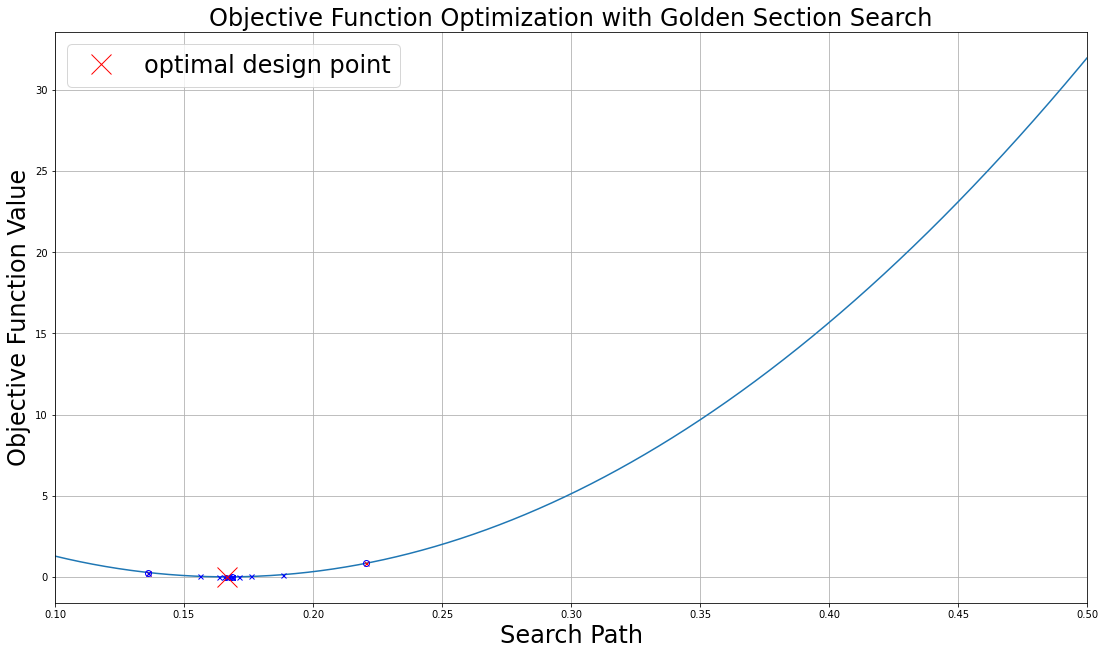

In [44]:
golden_search(fun,[1,1,1],[-4,-8,-4],.1,.5)

(0.2083198660520528, 0.5000019372183595, 14)

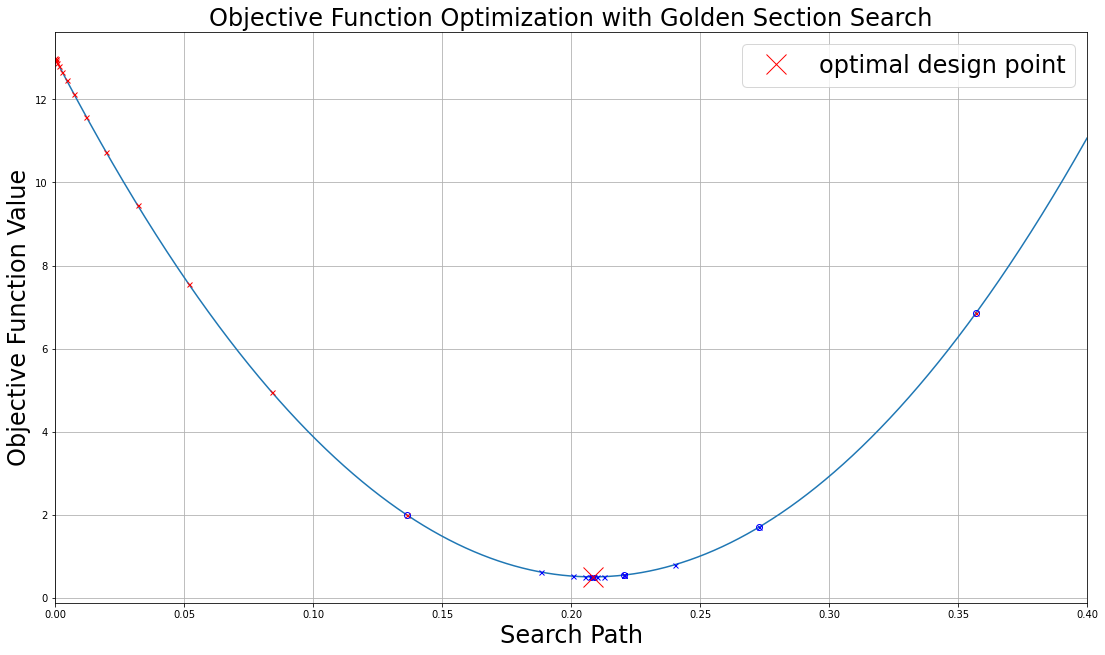

In [41]:
golden_search(fun,[1,1,2],[-4,-8,-4],0,.4)